In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [76]:
turnovers = pd.read_csv('/Users/iansheridan/Desktop/UCD/Turnovers1.csv')
turnovers.head()

,iD MATCH,SAISON,COMPETITION,BLOC,SEMAINE,DATE,JOURNEE,DOMICILE,EXTERIEUR,MATCH,Start time,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R,PORTEUR -
0,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"5828,883019968",Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L,NaN
1,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"1224,163019968",Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R,NaN
2,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"6230,363019968",Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R,NaN
3,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"603,283019968",Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL,NaN
4,475,2020-2021,PRO D2,BLOC 5 - DENALI,S32,12/02/2021,J19,USAP,USC,J19 USAP - USC,"5915,563019968",Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C,NaN


In [77]:
turnover = turnovers[['iD MATCH','DATE','DOMICILE','EXTERIEUR','JOUEUR','POSTE','EQUIPE','ADV','TYPE TURNOVER CONCEDE','Field Area','Field L-R']]
turnover.head()

,iD MATCH,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
0,475,12/02/2021,USAP,USC,Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L
1,475,12/02/2021,USAP,USC,Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R
2,475,12/02/2021,USAP,USC,Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R
3,475,12/02/2021,USAP,USC,Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL
4,475,12/02/2021,USAP,USC,Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C


In [78]:
turnover.set_index('iD MATCH')

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
475,12/02/2021,USAP,USC,Quentin Etienne,ARRIERE,USAP,USC,Dropped Ball Unforced,22 - 50,L
475,12/02/2021,USAP,USC,Julien Facundo,PILIER,USC,USAP,Dropped Ball Unforced,50 - 22,R
475,12/02/2021,USAP,USC,Christiaan van der Merwe,SECONDE LIGNE,USC,USAP,Carried Into Touch,22 - GL,R
475,12/02/2021,USAP,USC,Rynard Landman,SECONDE LIGNE,USC,USAP,Dropped Ball Unforced,50 - 22,CL
475,12/02/2021,USAP,USC,Darrell Dyer,TROISIEME LIGNE AILE,USC,USAP,Dropped Ball Unforced,22 - 50,C
...,...,...,...,...,...,...,...,...,...,...
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Forced,50 - 22,CL
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Unforced,22 - 50,CR
354,25/09/2020,OYO,AIX,Tony Ensor,ARRIERE,OYO,AIX,Dropped Ball Unforced,22 - 50,R


In [79]:
turnover = turnover.sort_values('iD MATCH')
turnover.head

<bound method NDFrame.head of       iD MATCH        DATE DOMICILE EXTERIEUR              JOUEUR  \
603        325  04/09/2020     SAXV       AIX           Ledua Mau   
615        325  04/09/2020     SAXV       AIX      Hikairo Forbes   
616        325  04/09/2020     SAXV       AIX    Jerome Mondoulet   
617        325  04/09/2020     SAXV       AIX        Tyrone Viiga   
604        325  04/09/2020     SAXV       AIX  Shalva Sutiashvili   
...        ...         ...      ...       ...                 ...   
3067       508  11/03/2021     USAP       AIX  Jean-Bernard Pujol   
3068       508  11/03/2021     USAP       AIX    Julien Ledevedec   
3069       508  11/03/2021     USAP       AIX       Charles Malet   
3046       508  11/03/2021     USAP       AIX     Quentin Walcker   
3060       508  11/03/2021     USAP       AIX      George Tilsley   

                       POSTE EQUIPE   ADV  TYPE TURNOVER CONCEDE Field Area  \
603                   CENTRE   SAXV   AIX  Dropped Ball Unforc

In [80]:
turnover.isnull().sum()/len(turnover)

iD MATCH                 0.000000
DATE                     0.000000
DOMICILE                 0.002270
EXTERIEUR                0.000681
JOUEUR                   0.003178
POSTE                    0.012486
EQUIPE                   0.000454
ADV                      0.000000
TYPE TURNOVER CONCEDE    0.002497
Field Area               0.000908
Field L-R                0.000000
dtype: float64

In [81]:
turnover.isnull().sum()/len(turnover)*100

iD MATCH                 0.000000
DATE                     0.000000
DOMICILE                 0.227015
EXTERIEUR                0.068104
JOUEUR                   0.317821
POSTE                    1.248581
EQUIPE                   0.045403
ADV                      0.000000
TYPE TURNOVER CONCEDE    0.249716
Field Area               0.090806
Field L-R                0.000000
dtype: float64

In [82]:
turnover.shape

(4405, 11)

In [83]:
turnover = turnover.dropna()

In [87]:
turnover.shape

(4312, 11)

In [88]:
turnover.head()

,iD MATCH,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
603,325,04/09/2020,SAXV,AIX,Ledua Mau,CENTRE,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
615,325,04/09/2020,SAXV,AIX,Hikairo Forbes,TALONNEUR,AIX,SAXV,Carried Into Touch,50 - 22,L
616,325,04/09/2020,SAXV,AIX,Jerome Mondoulet,SECONDE LIGNE,AIX,SAXV,Bad Pass,GL - 22,L
617,325,04/09/2020,SAXV,AIX,Tyrone Viiga,TROISIEME LIGNE CENTRE,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
604,325,04/09/2020,SAXV,AIX,Shalva Sutiashvili,SECONDE LIGNE,SAXV,AIX,Lost at Breakdown,22 - 50,L


In [91]:
turnover_index = turnover.set_index('iD MATCH')
turnover_index.head()

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
325,04/09/2020,SAXV,AIX,Ledua Mau,CENTRE,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
325,04/09/2020,SAXV,AIX,Hikairo Forbes,TALONNEUR,AIX,SAXV,Carried Into Touch,50 - 22,L
325,04/09/2020,SAXV,AIX,Jerome Mondoulet,SECONDE LIGNE,AIX,SAXV,Bad Pass,GL - 22,L
325,04/09/2020,SAXV,AIX,Tyrone Viiga,TROISIEME LIGNE CENTRE,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
325,04/09/2020,SAXV,AIX,Shalva Sutiashvili,SECONDE LIGNE,SAXV,AIX,Lost at Breakdown,22 - 50,L


In [92]:
print(turnover_index['TYPE TURNOVER CONCEDE'].nunique())

16


In [93]:
turnover = turnover_index

In [94]:
turnover.head()

,DATE,DOMICILE,EXTERIEUR,JOUEUR,POSTE,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,,,,,,
325,04/09/2020,SAXV,AIX,Ledua Mau,CENTRE,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
325,04/09/2020,SAXV,AIX,Hikairo Forbes,TALONNEUR,AIX,SAXV,Carried Into Touch,50 - 22,L
325,04/09/2020,SAXV,AIX,Jerome Mondoulet,SECONDE LIGNE,AIX,SAXV,Bad Pass,GL - 22,L
325,04/09/2020,SAXV,AIX,Tyrone Viiga,TROISIEME LIGNE CENTRE,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
325,04/09/2020,SAXV,AIX,Shalva Sutiashvili,SECONDE LIGNE,SAXV,AIX,Lost at Breakdown,22 - 50,L


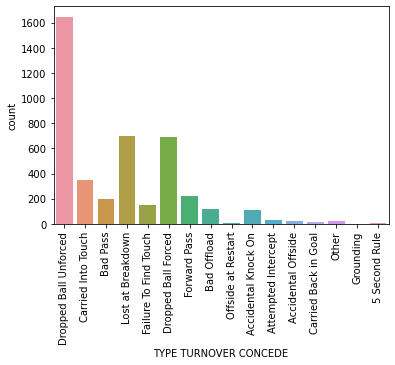

In [139]:
graph = sns.countplot(x='TYPE TURNOVER CONCEDE', data=turnover)
for item in graph.get_xticklabels():
    item.set_rotation(90)

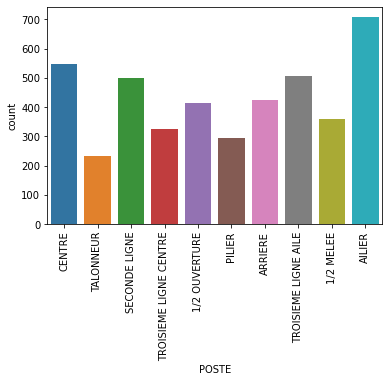

In [123]:
graph = sns.countplot(x='POSTE', data=turnover)
for item in graph.get_xticklabels():
    item.set_rotation(90)

In [140]:
turnover.dtypes

DATE                     object
DOMICILE                 object
EXTERIEUR                object
JOUEUR                   object
POSTE                    object
EQUIPE                   object
ADV                      object
TYPE TURNOVER CONCEDE    object
Field Area               object
Field L-R                object
dtype: object

In [151]:
saxv = turnover.iloc[0:19, 5:]
saxv.head()
saxv.iloc['SAXV']

,EQUIPE,ADV,TYPE TURNOVER CONCEDE,Field Area,Field L-R
iD MATCH,,,,,
325,SAXV,AIX,Dropped Ball Unforced,22 - 50,R
325,AIX,SAXV,Carried Into Touch,50 - 22,L
325,AIX,SAXV,Bad Pass,GL - 22,L
325,AIX,SAXV,Dropped Ball Unforced,22 - GL,CL
325,SAXV,AIX,Lost at Breakdown,22 - 50,L
